**Aluno:** Douglas Leite Leal Moura

**Matrícula:** 2020715184

**Projeto Final - Machine Learning**

Avaliação de Clientes de um Banco

Link do vídeo: https://youtu.be/9zxk7JHSrp0

#### Instruções

Este trabalho utiliza a bibliteca scikit-learn da linguagem Python (versão 3.6).

O ambiente virtual pode ser configurado mediante a execução dos seguintes comandos no terminal:

$ virtualenv -p python3 .env

$ source .env/bin/activate

$ pip install -r requirements.txt

A sequência de comandos abaixo faz os imports necessários para a execução dos experimentos:

In [115]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tabulate import tabulate
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.tree import plot_tree
from sklearn.cluster import KMeans

## 1. Introdução

A avaliação do risco de inadimplência tem um papel importante para os bancos e outros órgãos por estar associada a possíveis perdas e gerar grande impacto nas atividades do mercado financeiro. Fazer uma avaliação certeira permite que empréstimos sejam concedidos a mais pessoas e minimiza a perda da instituição que concede o crédito contribuindo para uma movimentação na economia.

Diante desse cenário, uma solução consiste em analisar uma base de dados de tomadores de crédito de um banco e avaliá-la com o propósito de utilização para a construção e estimação de um modelo analítico de previsão de inadimplência. No caso, um modelo preditivo que prevê se o tomador será um bom pagador baseado em características de clientes passados contidas nesta base de dados.

### 1.2 Objetivos

No presente trabalho, pretende-se avaliar um conjunto de soluções a fim de se obter um modelo preditivo capaz de determinar se um cliente de um banco irá pagar ou não um empréstimo solicitado.

Este trabalho utiliza uma base de dados contendo dados de clientes que solicitaram empréstimos junto a uma instituição financeira, como um banco. Pretende-se treinar diferentes algoritmos de classificação e avaliar a performance de cada um. Os seguintes algoritmos foram utilizados:

1. K-NN
2. SVM (linear e polinomial)
3. Árvores de decisão
4. Random Forest

Uma parte fundamental deste trabalho consistiu no estudo de informações importantes contidas nos dados, como relacionamentos (correlações). Assim, uma análise da explicabilidade foi realizada a fim de determinar quais atributos têm maior importância durante a predição.

Por fim, também foi feito um estudo a fim de encontrar padrões associados às solicitações de empréstimos. Uma técnica de agrupamento hierárquico foi utilizada para agrupar solicitações similares. Resultados encontrados mostraram a existência de dois grupos de solicitações.

### 1.3 Organização

Este trabalho está organizado da seguinte forma: A Seção 2 descreve o conjunto de dados utilizado e o tratamento dos dados. A Seção 3 apresenta os experimentos com os algoritmos de classificação (supervisionado). Em seguida, na Seção 4 estão os resultados com o algoritmo não-supervisionado. Por fim, a Seção 5 contém as considerações finais deste trabalho com os principais resultados obtidos e trabalhos futuros.


## 2. Conjunto de dados

O conjunto de dados foi importado utilizando _Pandas_, uma poderosa biblioteca Python criada para a manipulação e análise de dados.

O arquivo `df_emprestimos_banco.csv` trata-se do conjunto de dados utilizado neste problema de predição de inadimplência. Ele contém dados de clientes que solicitaram empréstimos de um banco.

Estes dados foram disponibilizados durante um desafio da **EloGroup**, uma empresa que presta consultoria na área de Tecnologia, Analytics e Gestão para apoiar organizações públicas e privadas.  

Trata-se de um conjunto de dados grande (com 50.390 exemplos) e que possui diversas informações potencialmente úteis para o aprendizado do modelo (22 features).

In [28]:
# caminho dos arquivos
DATA_PATH = os.path.join("datasets", "projeto-final", "")

FILE = "df_emprestimos_banco.csv"

# funcao para importar o dataset utilizando a lib pandas
def load_data(file, path=DATA_PATH):
    file_path = os.path.join(path, file)
    return pd.read_csv(file_path, sep=",")

# importando dados
data = load_data(FILE)
data.shape # dimensao dos dados.

(50390, 23)

O método `head` apresenta as cinco primeiras linhas do dataset.

É possível identificar diversas informações interessantes para o preditor, como escolaridade, renda mensal informal, valor do emprestimo etc.

No geral, são informações do cliente e do empréstimo solicitado.

Evidentemente, o dataset possui alguns obstáculos que precisam ser tratados antes do treinamento, como dados ausentes e categóricos.

In [29]:
data.head()

,Escolaridade,Renda Mensal Informal,Dependentes,Estado Civil,Idade,Conta Poupanca,Conta Salario,Quant Adiantamento Deposito,Qtd Fonte Renda,Cheque Sem Fundo,...,Valor Emprestimo,Multa,Juros,Valor Emprestimo Atualizado,PAGO,Controle,ID,Genero,Data,Estado
0,NaN,NaN,S,2,36,S,N,NaN,NaN,N,...,8174.32,263.25,5844.98,14282.55,1,1,1328587.0,1,2020-01-01,57
1,1.0,1894.5078,N,2,39,S,N,2.0,1.0,S,...,41775.63,1607.29,7652.26,51035.18,1,1,1424254.0,1,2020-01-01,59
2,1.0,NaN,S,2,26,S,N,NaN,1.0,S,...,522940.27,24860.40,319315.62,867116.29,1,1,1438519.0,0,2020-01-01,56
3,NaN,NaN,N,8,23,N,N,NaN,NaN,N,...,1593.00,21472.36,2967.48,26032.84,1,1,1426138.0,1,2020-01-01,56
4,NaN,NaN,S,2,33,S,N,NaN,NaN,N,...,2078.97,19.44,46.35,2144.76,1,1,1474504.0,0,2020-01-01,59


O atributo `PAGO` é a classe que queremos predizer. Trata-se de um problema de classificação binária, onde `0` indica que o emprestimo não foi pago e `1` indica que o empréstimo foi pago.

Outro problema presente neste conjunto de dados é o desbalanceamento no número de exemplos de cada classe:

* 39.853 pagaram o empréstimo
* 10.537 não pagaram o empréstimo

É importante para o preditor, prever clientes inadimplentes, contudo, temos poucos exemplos desta classe.

A simples avaliação da acurácia pode não ser interessante para este problema, por isso outras métricas de avaliação também serão utilizadas, como precisão, revocação e F1-score.

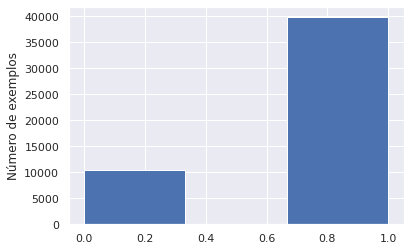

In [30]:
# plota um histograma da distribuição de y.
plt.hist(data['PAGO'], bins=3)
plt.ylabel('Número de exemplos')
plt.show()

A matrix de correlação abaixo mostra quais atributos estão mais relacionados entre si.

Ela revela diversos relacionamentos interessantes:

* A escolaridade possui uma correlação positiva com a renda mensal informal, com a quantidade de fonte de renda e com a idade.

* O id do usuário não possui qualquer relação se o empréstimo foi pago ou não.

* Há uma alta correlação entre o valor do empréstimo, multa, juros e o valor do empréstimo atualizado.

* A matrix de correlação sugere uma leve correlação negativa entre a classe e os atributos referentes a escolaridade e a renda.

Ou seja, uma escolaridade maior não sugere que o empréstimo será pago. Contudo, o adiantamento do dipósito poderia sugerir algo (pouco).

No momento, estes relacionamentos ainda não estão tão claros. Note que alguns atributos são categóricos, como estado civil. Outros atributos estão vázios ou com valores repetidos (valor conta correte, controle etc).

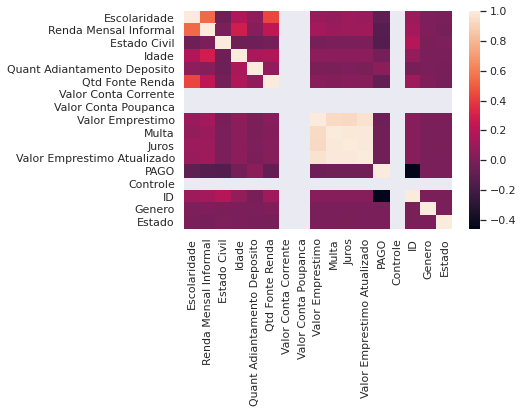

In [31]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix)
plt.show()

Esta análise preliminar revelou diversos insights sobre o conjunto de dados, como a necessidade de tratamento antes do treinamento.

Por isso, a seção seguinte do trabalho consiste em tratar os problemas identificados. 

### 2.1 Tratamento dos dados

O método `info` fornece uma visão geral dos atributos, como o tipo do atributo e a quantidade de dados ausentes.

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50390 entries, 0 to 50389
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Escolaridade                 14615 non-null  float64
 1   Renda Mensal Informal        9768 non-null   float64
 2   Dependentes                  50390 non-null  object 
 3   Estado Civil                 50390 non-null  int64  
 4   Idade                        50390 non-null  int64  
 5   Conta Poupanca               50390 non-null  object 
 6   Conta Salario                50390 non-null  object 
 7   Quant Adiantamento Deposito  21843 non-null  float64
 8   Qtd Fonte Renda              12806 non-null  float64
 9   Cheque Sem Fundo             50390 non-null  object 
 10  Conta Conjunta               50390 non-null  object 
 11  Valor Conta Corrente         0 non-null      float64
 12  Valor Conta Poupanca         0 non-null      float64
 13  Valor Emprestimo

Foi constatado que as seguintes features possuem **todos os dados ausentes**:
* 11 **Valor Conta Corrente** (numérico)
* 12 **Valor Conta Poupanca** (numérico)

Para este caso, as duas colunas serão excluidas do dataset.

Outras colunas também serão excluídas:

* 12 **Controle** (numérico) - todos os dados são iguais
* 19 **ID** (numérico) - ID do cliente
* 21 **Data** (object) - todas os dados são iguais

Estes atributos possuem pouco potencial preditivo, por isso também serão excluídos.

In [33]:
# remove features
columns = ['Valor Conta Corrente', 'Valor Conta Poupanca', 'Controle', 'ID', 'Data']
data = data.drop(columns=columns)

Outras colunas, embora **incompletas**, ainda possuem dados:

* 0 **Escolaridade** (categórico) - falta cerca de 70.99%
* 1 **Renda Mensal Informal** (numérico) - falta cerca de 80.61%
* 7 **Quant Adiantamento Deposito** (numérico) - falta cerca de 56.65%
* 8 **Qtd Fonte Renda** (numérico) - Falta cerca de 74.58%

Para este caso, uma possibilidade é preencher os dados ausentes com base nos dados já existentes.
Assim, os dados ausentes foram preechindos com a média do atributo.

Embora a escolaridade tenha sido apotanda como um atributo númerico pelo método `info`, trata-se de um atributo categórico, em que:

1 - Nível Médio 2 - Ensino Superior 3 - Pós Graduação

Neste caso, não faz sentido calcular a média. Optou-se por preencher os dados com o valor mais típico para este atributo. Isto é, o valor 1, que remete ao `Nível Médio`.

In [34]:
# preencher com a media
median = data["Renda Mensal Informal"].mean()
data["Renda Mensal Informal"] = data["Renda Mensal Informal"].fillna(median)

#data["Renda x valor do emprestimo"] = data["Renda Mensal Informal"]/data["Valor Emprestimo Atualizado"]

median = data["Quant Adiantamento Deposito"].mean()
data["Quant Adiantamento Deposito"] = data["Quant Adiantamento Deposito"].fillna(median)

median = data["Qtd Fonte Renda"].mean()
data["Qtd Fonte Renda"] = data["Qtd Fonte Renda"].fillna(median)

# preencher com o mais frequente
encoder = LabelBinarizer()
most = data["Escolaridade"].value_counts().index[0]
data["Escolaridade"] = data["Escolaridade"].fillna(most)
one_hot = encoder.fit_transform(data['Escolaridade'])
data = pd.concat([data, pd.DataFrame(one_hot)], axis=1)
data = data.drop('Escolaridade', axis=1)

Além de escolaridade, outros atributos também são categóricos:
    
* **Estado Civil**: 2 - Solteiro, 8 - Casado(a) com comunhão de bens, 4 - Casado(a) com comunhão parcial de bens, 3 - Casado(a) com separação de bens, 1 - Divorciado,  11 - Separado Judicialmente, 7 - Viúvo(a),  9 - Outros

* **Conta Poupanca**: N- Não, S - Sim
* **Conta Salario**: N - Não, S - Sim
* **Cheque Sem Fundo**: N - Não, S - Sim
* **Conta Conjunta**: N - Não, S - Sim
* **Genero**: 0 - Masculino, 1 - Feminino
* **Estado**: 56 - São Paulo, 57 - Minas Gerais, 58 - Rio de Janeiro, 59 - Espirito Santo

Neste caso, o label e one-hot encoder foram utilizados para converter dados categóricos em dados binários.

In [35]:
# converter para numeros
encoder = LabelEncoder()
data['Dependentes'] = encoder.fit_transform(data['Dependentes'])
data['Conta Poupanca'] = encoder.fit_transform(data['Conta Poupanca'])
data['Conta Salario'] = encoder.fit_transform(data['Conta Salario'])
data['Cheque Sem Fundo'] = encoder.fit_transform(data['Cheque Sem Fundo'])
data['Conta Conjunta'] = encoder.fit_transform(data['Conta Conjunta'])

encoder = LabelBinarizer()
one_hot = encoder.fit_transform(data['Estado Civil'])
data = pd.concat([data, pd.DataFrame(one_hot)], axis=1)
data = data.drop('Estado Civil', axis=1)

Após o tratamento dos dados, a matrix de correlação revelou novos relacionamentos. Como alguns associados ao estado civil.

Em seguida, a função describe mostra a distribuição dos dados. No geral, foi possível perceber diferenças nas escalas dos atributos. Sendo necessário normalizar os dados. A fim de evitar vazamento de dados, a normalização foi realizada posteriormente, após o particionamento dos dados.

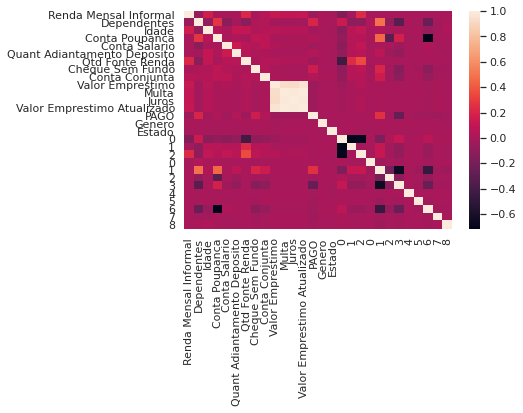

In [36]:
#data.info

corr_matrix = data.corr()
sns.heatmap(corr_matrix, xticklabels=True, yticklabels=True)
plt.show()

In [37]:
data.describe()

,Renda Mensal Informal,Dependentes,Idade,Conta Poupanca,Conta Salario,Quant Adiantamento Deposito,Qtd Fonte Renda,Cheque Sem Fundo,Conta Conjunta,Valor Emprestimo,...,2,0,1,2,3,4,5,6,7,8
count,50390.000000,50390.000000,50390.000000,50390.000000,50390.000000,50390.000000,50390.000000,50390.000000,50390.000000,5.039000e+04,...,50390.000000,50390.00000,50390.000000,50390.000000,50390.000000,50390.000000,50390.000000,50390.000000,50390.000000,50390.000000
mean,4635.610641,0.360032,31.724529,0.847986,0.023397,2.104931,1.241605,0.230026,0.041715,5.198927e+04,...,0.016571,0.00133,0.547053,0.030959,0.263604,0.000020,0.000814,0.154098,0.000655,0.001469
std,10908.128483,0.480014,8.565117,0.359038,0.151164,0.591530,0.250125,0.420853,0.199938,1.588819e+06,...,0.127658,0.03644,0.497786,0.173207,0.440591,0.004455,0.028513,0.361046,0.025583,0.038294
min,0.009600,0.000000,18.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.431000e+03,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4635.610641,0.000000,26.000000,1.000000,0.000000,2.000000,1.241605,0.000000,0.000000,1.593000e+03,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4635.610641,0.000000,30.000000,1.000000,0.000000,2.104931,1.241605,0.000000,0.000000,2.298035e+03,...,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4635.610641,1.000000,35.000000,1.000000,0.000000,2.104931,1.241605,0.000000,0.000000,7.172175e+03,...,0.000000,0.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,516960.779100,1.000000,113.000000,1.000000,1.000000,18.000000,3.000000,1.000000,1.000000,2.867894e+08,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Por fim, o atribute de classe foi separado do conjunto de dados, que agora foi preparado para o treinamento.

In [38]:
X = data.drop("PAGO", axis=1) # remove atributo que sera predita.
y = data["PAGO"].copy()

## 3. Algoritmos de classificação

Esta seção relata os resultados obtidos em cada classificador.

### 3.1 Funcões auxiliares

Algumas funções e classes foram implementadas para auxiliar os experimentos de treinamento e visualização dos resultados.

A classe Scores foi criada para facilitar o cálculo e visualização das métricas de desempenho.

O classificador irá treinar o modelo e registrar as métricas na classe Scores por meio do método adicionar. Esta classe também fornece a média e o desvio padrão da acurácia.

In [39]:
class Scores(object):
    """Registra as métricas de desempenho."""
    def __init__(self):
        self.accuracy = []
        self.fpr = []
        self.tpr = []
        self.precision = []
        self.recall = []
        self.f1 = []
        self.folds = 0
        
    def mean(self):
        """Retorna a media da acuracia."""
        return np.mean(self.accuracy)
    
    def std(self):
        """Calcula o desvio padrao da acuracia."""
        return np.std(self.accuracy)        
    
    def adicionar(self, accuracy, fpr, tpr, precision, recall, f1):
        """Adiciona as métricas de cada fold."""
        self.accuracy.append(accuracy)
        self.fpr.append(fpr)
        self.tpr.append(tpr)
        self.precision.append(precision)
        self.recall.append(recall)
        self.f1.append(f1)
        self.folds += 1 # incrementa o numero de folds

A função show_scores utiliza a biblioteca tabulate para produzir um relatório contendo as métricas de precision, recall, F1-score de cada fold, além de uma média.

In [40]:
def show_scores(precision, recall, f1, folds):
        """Mostra uma tabela com as métricas de desempenho."""
        table = []
        matrix = np.zeros((folds, 4))
        
        # metrica para cada fold.
        for i in range(folds):
            row = []
            matrix[i,:] = [int(i), np.mean(precision[i]), np.mean(recall[i]), np.mean(f1[i])]
            row.append(i) # numero de folds
            row.append(format(matrix[i,1], '.3f')) # media do precision
            row.append(format(matrix[i,2], '.3f')) # media do recall
            row.append(format(matrix[i,3], '.3f')) # media do f1
            table.append(row)
        
        # media
        row = []
        media = list(matrix[:,1:].mean(0))
        row.append("Média")
        row.append(format(media[0], '.3f'))
        row.append(format(media[1], '.3f'))
        row.append(format(media[2], '.3f'))
        
        table.append(row)

        names = ["# fold", "Precision", "Recall", "F1-score"]
        table = tabulate(table, headers=names, tablefmt="pretty")
    
        return table

A função plt_parametro foi criada para facilitar a geração dos gráficos durante a variação dos parâmetros.

A função recebe o modelo e os valores que serão avaliados. Ao final, um gráfico é gerado com a curva da acurácia.

In [41]:
@ignore_warnings(category=ConvergenceWarning)
def plt_parametro(X, y, model, params, lim=None):
    """Função para gerar o gráfico da acurácia."""
    param_grid = ParameterGrid(params)
    
    mean = []
    std = []
    x = []
    xlab = list(params)[0]
    
    # treina cada modelo e salva as estatísticas
    for params in param_grid:
        x += (params.values())
        model.set_params(**params)
        clf = Classificador(X, y, model)
        clf.treinar()
        mean.append(clf.scores.mean())
        std.append(clf.scores.std())

    # Plota a média e o desvio padrão do cross-validation.
    plt.figure()
    mean = np.array(mean)
    std = np.array(std)
    plt.plot(x, mean)
    plt.fill_between(x,mean-std,mean+std,alpha=.1)
    plt.title("Acurácia do cross-validation")
    plt.xlabel(xlab)
    plt.ylabel("Acurácia")
    if lim == None:
        plt.ylim(0.8, 1)
    else:
        plt.ylim(lim, 1)
    plt.show()

A função plt_roc foi implementada para calcular e gerar o gráfico da curva ROC.

A função produz a curva de cada fold e, ao final, exige uma média. Para cada curva também foi calculado a área sub a curva (AUC).

In [42]:
def plt_roc(fpr, tpr, folds):
    """Função para gerar o gráfico da curva ROC."""
    
    plt.figure()
    mean_fpr = np.linspace(0,1,100)
    mean_auc = []
    tprs = []
    
    # Irá gerar uma curva para cada fold.
    for i in range(folds):
        roc_auc = auc(fpr[i], tpr[i]) # calcula area sob a curva (AUC)
        mean_auc.append(roc_auc)
        lbl = "Fold {} (AUC = {:.2f})".format(i, roc_auc)
        plt.plot(fpr[i], tpr[i], alpha=0.3, linewidth=2, label=lbl)
        tprs.append(np.interp(mean_fpr, fpr[i], tpr[i]))
    
    # Irá plotar a média dos folds
    mean_tpr = np.mean(tprs, axis=0)
    lbl = "Média (AUC = {:.2f})".format(np.mean(mean_auc))
    plt.plot(mean_fpr, mean_tpr, "b", linewidth=2, label=lbl)
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.title("Curva ROC")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

### 3.2 Método de Validação Cruzada

Como forma de melhor avaliar a capacidade de generalização dos modelos analisados, adotou-se o método de valizadação cruzada por meio do k-fold.

O conjunto de dados foi particionado em 5 folds (outros valores também foram avaliados). Desta forma, cada partição será utilizada para treino e teste.

Como forma de evitar vazamento de dados, o processo de normalização dos dados foi executado em cada fold seguindo a seguinte função:

`z = (x - u) / s`

Onde `u` é a média dos exemplos de treinamento `x` e `s` é o desvio padrão.

In [43]:
class Classificador(object):
    '''Classe responsável por treinar o modelo.'''
    
    def __init__(self, X, y, model, folds=5):
        
        self.X = X # Conjunto de dados
        self.y = y # Classe dos dados
        self.model = model # Modelo usado para treinar
        self.folds = folds # Numero de k-folds (default 5).
        self.scores = Scores() # Metricas do classificador
    
    def treinar(self):
        """Treina o classificador usando o k-fold."""

        skf = StratifiedKFold(n_splits=self.folds, shuffle=False)

        for train_index, test_index in skf.split(self.X, self.y):
            X_train,X_test = X.iloc[train_index],X.iloc[test_index]
            y_train,y_test = y.iloc[train_index],y.iloc[test_index]

            # normalização
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            # treinamento
            self.model.fit(X_train,y_train)
            y_pred = self.model.predict(X_test).reshape(-1,)
            
            # calcula todos os scores
            accuracy = accuracy_score(y_test, y_pred) # acurácia
            y_pred_proba = self.model.predict_proba(X_test)[:,1]
            fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1) # curva roc
            precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0) # precision
            recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0) # recall
            f1 = f1_score(y_test, y_pred, pos_label=1, zero_division=0) # f1-score
            
            # salva os scores
            self.scores.adicionar(accuracy, fpr, tpr, precision, recall, f1)

        return self.model

Para facilitar o processo de descoberta do melhor conjunto de hiper-parâmetros, foi proposta uma função find_parameters, que recebe como entrada o conjunto de dados, a classe, o modelo e um dicionário de hiper-parâmetros.

A função irá realizar todas as combinações, treinar o algoritmo e, ao final, informar qual configuração obteve a melhor acurácia.

In [44]:
@ignore_warnings(category=ConvergenceWarning)
def find_parameters(X, y, model, params, folds, imprimir=True):
    """Função responsável por analisar os parâmetros do modelo."""
    
    param_grid = ParameterGrid(params)
    best_score = 0
    best_params = None
    best_clf = None
    
    print("Analisando ({}) combinações de parâmetros:".format(len(param_grid)))
    print("+----------------------------------------+")
    for params in param_grid:
        model.set_params(**params)
        clf = Classificador(X, y, model, folds)
        clf.treinar()
        
        # verifica se a acuracia é melhor que a atual.
        if clf.scores.mean() > best_score:
            best_score = clf.scores.mean()
            best_params = params
            best_clf = clf
        
        if imprimir:
            print("Acurácia: {:.3f} (+/- {:.3f}) for {} ".format(clf.scores.mean(), clf.scores.std(), params))
    
    print("+----------------------------------------+")
    print("Melhor combinação: {}".format(best_params))
    return best_clf

### 3.3 Resultados

Quatro algoritmos de classificação foram avaliadas através do método de validação cruzada. Os experimentos consideraram 5 e 10 partições, onde a melhor foi aquela com melhor média e desvio padrão.

Cada algoritmo teve seu conjunto de hiperparâmetros analisado.

As métricas de desempenho analisadas foram:
* Acurácia
* Precision
* Recall
* F1-Score

Além disso, a curva ROC também foi analisada. 

#### 3.3.1 K-NN

O K-NN é um classificador que baseia-se no cálculo da distância para os k-vizinhos mais próximos. Onde uma nova instância será classificada de acordo com a classificação majoritária dos k-vizinhos mais próximos.

O objetivo deste experimento foi avaliar o desepenho do k-NN para diferentes valores de K:

* **n_neighbors** = {1, 2, ..., 5} Número K de vizinhos mais próximos.

Em razão do grande número de exemplos, não foi possível avaliar com valores maiores de k, pois o algoritmo baseia-se no calculo da distância de um exemplo para todos os demais, gerando um alto custo computacional.

A distância utilizada foi `minkowski` com p=2. Deste modo, a distância obtida foi equivalente à distância euclidiana, dada por:

`sqrt(sum((x - y)^2))`

#### 5-folds:

O modelo que retornou a melhor acurácia foi com k = 5. Na verdade, a acurácia segue um padrão de crescimento, com algumas quedas nos valores par de k.

Seria interessante avaliar valores ainda maiores, pois o padrão de crescimento sugere que o algoritmo obtém melhores resultados com um k maior que 5.

A precisão do algoritmo foi por volta de 80%, onde o recall foi maior que 90%.

Estes resultados mostram que o algoritmo possui uma boa precisão ao classificar os empréstimos pagos, mas ele ainda comete erros classificando empréstimos não pagos como pagos.

Este resultado é evidente ao analisar a curva ROC. O valor da área sob a curva ficou entre 0.5 ~ 0.6.

Analisando (5) combinações de parâmetros:
+----------------------------------------+
+----------------------------------------+
Melhor combinação: {'n_neighbors': 5}
Acurácia Média: 0.769
Desvio Padrão: 0.005
+--------+-----------+--------+----------+
| # fold | Precision | Recall | F1-score |
+--------+-----------+--------+----------+
|   0    |   0.804   | 0.942  |  0.867   |
|   1    |   0.806   | 0.934  |  0.865   |
|   2    |   0.800   | 0.933  |  0.862   |
|   3    |   0.807   | 0.939  |  0.868   |
|   4    |   0.799   | 0.936  |  0.862   |
| Média  |   0.803   | 0.937  |  0.865   |
+--------+-----------+--------+----------+


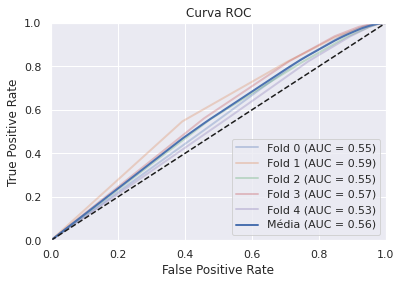

In [26]:
params = {"n_neighbors":range(1,6)} # hiper-parâmetros avaliados

knn = KNeighborsClassifier() # Classificador

knn = find_parameters(X, y, knn, params, 5, False) # Melhor classificador

s = knn.scores # Estatisticas do melhor
print("Acurácia Média: {:.3f}".format(np.mean(s.accuracy)))
print("Desvio Padrão: {:.3f}".format(np.std(s.accuracy)))
print(show_scores(s.precision, s.recall, s.f1, s.folds))

plt_roc(s.fpr, s.tpr, s.folds) # Curva ROC do melhor

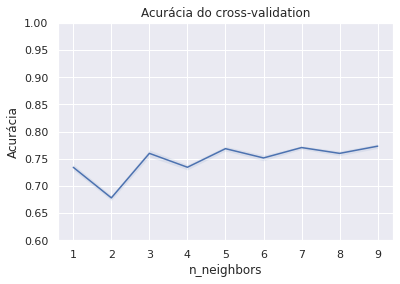

In [28]:
# Variando o número de k vizinhos
params = {"n_neighbors":range(1, 10)}

knn_2 = KNeighborsClassifier()
plt_parametro(X, y, knn_2, params, 0.6)

#### 10-folds

Com 10 folds foi possível ter uma acurácia melhor, mas note que o desvio padrão foi maior. Por isso, estes resultados são mais imprecisos que o anterior.

Analisando (5) combinações de parâmetros:
+----------------------------------------+
+----------------------------------------+
Melhor combinação: {'n_neighbors': 5}
Acurácia Média: 0.773
Desvio Padrão: 0.008
+--------+-----------+--------+----------+
| # fold | Precision | Recall | F1-score |
+--------+-----------+--------+----------+
|   0    |   0.809   | 0.942  |  0.870   |
|   1    |   0.806   | 0.945  |  0.870   |
|   2    |   0.811   | 0.932  |  0.867   |
|   3    |   0.813   | 0.939  |  0.871   |
|   4    |   0.805   | 0.934  |  0.864   |
|   5    |   0.803   | 0.933  |  0.863   |
|   6    |   0.815   | 0.942  |  0.874   |
|   7    |   0.806   | 0.936  |  0.866   |
|   8    |   0.796   | 0.928  |  0.857   |
|   9    |   0.807   | 0.935  |  0.867   |
| Média  |   0.807   | 0.936  |  0.867   |
+--------+-----------+--------+----------+


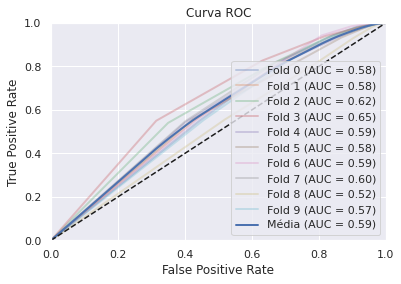

In [32]:
params = {"n_neighbors":range(1,6)} # hiper-parâmetros avaliados

knn = KNeighborsClassifier() # Classificador

knn = find_parameters(X, y, knn, params, 10, False) # Melhor classificador

s = knn.scores # Estatisticas do melhor
print("Acurácia Média: {:.3f}".format(np.mean(s.accuracy)))
print("Desvio Padrão: {:.3f}".format(np.std(s.accuracy)))
print(show_scores(s.precision, s.recall, s.f1, s.folds))

plt_roc(s.fpr, s.tpr, s.folds) # Curva ROC do melhor

#### Resultados

No geral, para este problema, observou-se que o K-NN melhora com o aumento de K.

O melhor resultado foi k = 5 (o maior valor permitido).

Além disso, foi possível perceber uma queda sempre que K assumia valores pares.

Tipicamente, costuma-se adotar valores ímpares para K como forma de evitar impasses durante a classificação. Por exemplo, uma instância onde os K vizinhos mais próximos estão perfeitamente distribuídos entre as duas classes: 50% classe A e 50% classe B. Um número ímpar resolve esta situação de impasse.

#### 3.3.3 SVM (Linear e Polinomial)

Foi utilizado o classificador SVC, que implementa todos as funções kernels solicitados neste trabalho.

Para esta tarefa, cada kernel foi devidamente avaliado com diferentes combinações de parâmetros.

Em todos os experimentos:

* **probability** foi fixado em True. Este procedimento foi necessário para calcular a curva ROC.
* **C** = {0.001, 0.01, 0.1, 1, 10, 100}.
C é um parâmetro de regularização, responsável por aplicar penalidades aos exemplos que ultrapassam a margem do SVM.

O SVM é um classificador que trabalha com o conceito de margem máxima. Ele irá ajustar um limite de decisão que permita minimizar o erro de classificação ao passo que busca maximizar a margem que separa os exemplos das duas classes.

Quando C é suficientemente grande (tendendo ao infinito), o SVM não irá permitir violações de margem. Este hiper-parâmetro possui um alto impacto na performance do algoritmo (acurácia e custo computacional). Por isso ele foi avaliado em todos os cenários.

Além disso, cada função kernel possui hiper-parâmetros específicos que foram analisados. Os resultados serão relatados a seguir.

#### Kernel Linear

A primeira função kernel avaliada foi o kernel linear.

Embora produza hipóteses mais simples, o kernel linear obteve resultados interessantes.

Com o parâmetro C = 10, foi possível obter uma acurácia de 95.3%.

Note que a precision e o recall também foram superiores a 90%.

Analisando (6) combinações de parâmetros:
+----------------------------------------+
Acurácia: 0.791 (+/- 0.001) for {'C': 0.001, 'kernel': 'linear', 'max_iter': 200, 'probability': True} 
Acurácia: 0.791 (+/- 0.000) for {'C': 0.01, 'kernel': 'linear', 'max_iter': 200, 'probability': True} 
Acurácia: 0.791 (+/- 0.001) for {'C': 0.1, 'kernel': 'linear', 'max_iter': 200, 'probability': True} 
Acurácia: 0.695 (+/- 0.177) for {'C': 1, 'kernel': 'linear', 'max_iter': 200, 'probability': True} 
Acurácia: 0.703 (+/- 0.090) for {'C': 10, 'kernel': 'linear', 'max_iter': 200, 'probability': True} 
Acurácia: 0.792 (+/- 0.001) for {'C': 100, 'kernel': 'linear', 'max_iter': 200, 'probability': True} 
+----------------------------------------+
Melhor combinação: {'C': 100, 'kernel': 'linear', 'max_iter': 200, 'probability': True}
+--------+-----------+--------+----------+
| # fold | Precision | Recall | F1-score |
+--------+-----------+--------+----------+
|   0    |   0.792   | 0.997  |  0.883   |


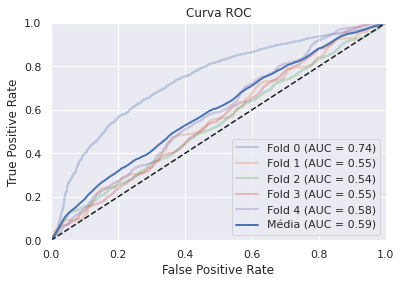

In [19]:
params = {"C":[0.001, 0.01, 0.1, 1, 10, 100],
          "kernel":["linear"],
          "max_iter":[200],
          "probability":[True]}

k_linear = SVC() # classificador

k_linear = find_parameters(X, y, k_linear, params, 5, True) # Melhor classificador

s = k_linear.scores # Estatisticas do melhor
print(show_scores(s.precision, s.recall, s.f1, s.folds))
print("Acurácia Média: {:.3f}".format(np.mean(s.accuracy)))
print("Desvio Padrão: {:.3f}".format(np.std(s.accuracy)))

plt_roc(s.fpr, s.tpr, s.folds) # Curva ROC do melhor

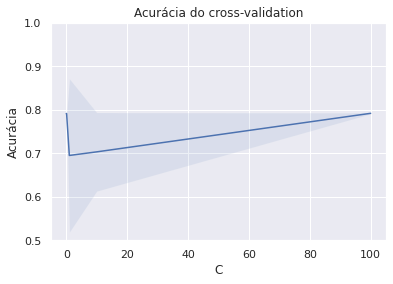

In [52]:
# Variando apenas C.
params = {"C":[0.001, 0.01, 0.1, 1, 10, 100]}

svm = SVC(kernel="linear", probability = True, max_iter=200)
plt_parametro(X, y, svm, params, 0.5)

In [ ]:
#### Kernel Polinomial

Para o kernel polinomial, foi avaliado o `degree` igual a 2 e 3.

Analisando (12) combinações de parâmetros:
+----------------------------------------+
Acurácia: 0.791 (+/- 0.000) for {'C': 0.001, 'degree': 2, 'kernel': 'poly', 'max_iter': 200, 'probability': True} 
Acurácia: 0.791 (+/- 0.000) for {'C': 0.001, 'degree': 3, 'kernel': 'poly', 'max_iter': 200, 'probability': True} 
Acurácia: 0.791 (+/- 0.000) for {'C': 0.01, 'degree': 2, 'kernel': 'poly', 'max_iter': 200, 'probability': True} 
Acurácia: 0.791 (+/- 0.000) for {'C': 0.01, 'degree': 3, 'kernel': 'poly', 'max_iter': 200, 'probability': True} 
Acurácia: 0.791 (+/- 0.001) for {'C': 0.1, 'degree': 2, 'kernel': 'poly', 'max_iter': 200, 'probability': True} 
Acurácia: 0.791 (+/- 0.001) for {'C': 0.1, 'degree': 3, 'kernel': 'poly', 'max_iter': 200, 'probability': True} 
Acurácia: 0.791 (+/- 0.000) for {'C': 1, 'degree': 2, 'kernel': 'poly', 'max_iter': 200, 'probability': True} 
Acurácia: 0.791 (+/- 0.001) for {'C': 1, 'degree': 3, 'kernel': 'poly', 'max_iter': 200, 'probability': True} 
Acurácia

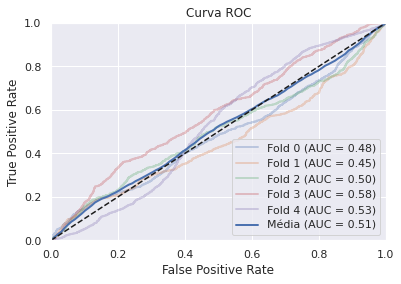

In [47]:
params = {"C":[0.001, 0.01, 0.1, 1, 10, 100],
          "kernel":["poly"],
          "degree":[2, 3],
          "max_iter":[200],
          "probability":[True]}

k_poly = SVC() # Classificador

k_poly = find_parameters(X, y, k_poly, params, 5, True) # Melhor classificador

s = k_poly.scores # Estatisticas do melhor
print("Acurácia Média: {:.3f}".format(np.mean(s.accuracy)))
print("Desvio Padrão: {:.3f}".format(np.std(s.accuracy)))
print(show_scores(s.precision, s.recall, s.f1, s.folds))

plt_roc(s.fpr, s.tpr, s.folds) # Curva ROC do melhor

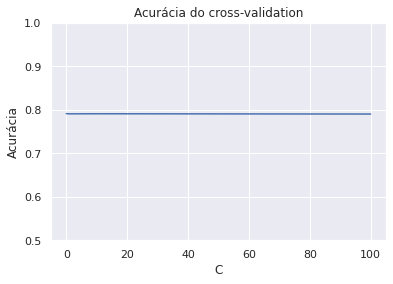

In [53]:
# Variando apenas C
params = {"C":[0.001, 0.01, 0.1, 1, 10, 100]}

svm = SVC(kernel="poly", degree=2, probability = True, max_iter=200)
plt_parametro(X, y, svm, params, 0.5)

#### Resultados

Particulamente, este algoritmo foi bem díficil de treinar em razão do número de exemplos. Por isso, o número máximo de iterações foi fixado em 200 (valor escolhido após execuções preliminares.)

Com o número máximo de execuções, o algoritmo ficou executando durante horas. Este comportamento sugere que o espaço de busca de soluções não é convexo, e sua função objetivo é bem difícil de otimizar.

Uma vez que a execução do algoritmo foi encerrada antes de sua convergência, o SVM teve os piores resultados.

Dentre as duas funções kernels avaliadas, o kernel linear teve o melhor resultado.

Em nenhum momento a acurácia média foi maior que 80%. O algoritmo não teve uma precisão tão boa, mas a revocação foi de quase 100%. O modelo encontrado consegue classificar bem quase 100% dos exemplos positivos. Assim como no k-nn, um problema existente é a classificação de exemplos da classe negativa.

#### 3.3.3 Decision Tree

Para esta tarefa foi utilizado o classificador DecisionTreeClassifier.

Além da altura máxima da árvore (objetivo da tarefa), os seguintes parâmetros também foram avaliados:

* max_depth = {2, 4, 8, 16, 32, 64, **None**} - altura máxima da árvore. Em None, a árvore irá crescer de forma ilimitada.
* min_samples_split = {**2**, 4, 8, 16, 32} - número mínimo de exemplos para ramificar um nó.
* min_samples_leaf = {**1**, 2, 3, 4} - número mínimo de exemplos para um nó ser uma folha.

Os valores em negrito destacam valores default de cada hiperparâmetro do classificador.

O objetivo deste experimento foi analisadar como diferentes combinações de hiperparâmetros produzem árvores distintas.

Analisando (100) combinações de parâmetros:
+----------------------------------------+
+----------------------------------------+
Melhor combinação: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2}
Acurácia Média: 0.845
Desvio Padrão: 0.009
+--------+-----------+--------+----------+
| # fold | Precision | Recall | F1-score |
+--------+-----------+--------+----------+
|   0    |   0.852   | 0.948  |  0.898   |
|   1    |   0.879   | 0.936  |  0.907   |
|   2    |   0.874   | 0.950  |  0.910   |
|   3    |   0.876   | 0.951  |  0.912   |
|   4    |   0.875   | 0.935  |  0.904   |
| Média  |   0.871   | 0.944  |  0.906   |
+--------+-----------+--------+----------+


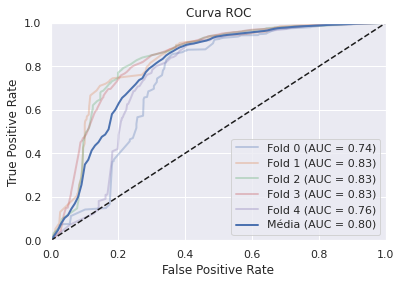

In [56]:
# Parametros avaliados
params = {"max_depth":[2, 4, 8, 16, None],
          "criterion":["entropy"],
          "min_samples_split":[2, 4, 8, 16, 32],
          "min_samples_leaf":[1, 2, 3, 4]}

tree = DecisionTreeClassifier() # Classificador

tree = find_parameters(X, y, tree, params, 5, False) # Busca pelo melhor classificador

s = tree.scores # Estatisticas do melhor
print("Acurácia Média: {:.3f}".format(np.mean(s.accuracy)))
print("Desvio Padrão: {:.3f}".format(np.std(s.accuracy)))
print(show_scores(s.precision, s.recall, s.f1, s.folds))

plt_roc(s.fpr, s.tpr, s.folds) # Curva ROC do melhor

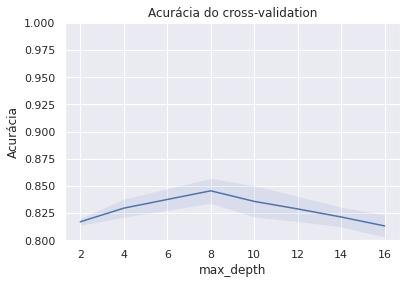

In [21]:
params = {"max_depth":[2, 4, 8, 10, 12, 14, 16]} # Variando apenas a altura da árvore

tree_2 = DecisionTreeClassifier()
plt_parametro(X, y, tree_2, params)

#### Resultados

Os últimos algoritmos analisados são os algoritmos baseados em árvores.

Com uma profundidade máxima = 8, a árvore de decisão obteve o melhor resultado dentre todos os algoritmos analisados.

O modelo chegou a ter uma acurácia de 84.50%, porém foi caindo conforme a altura da árvore crescia. Este comportamento sugere que a árvore passou a overfittar os dados, por isso a poda foi essencial para o desempenho do algoritmo.

Este aumento na precisão reflete na curva ROC. Note que a taxa de falso positivo foi bem menor. Isto acontece porque agora o modelo é capaz de classificar corretamente grande parte dos clientes que não pagaram o empréstimo.

Este resultado é extremamente importante, pois predizer inadimplentes é de extrema importância para o problema.

#### 3.3.4 Random Forest

Uma Random Forest utiliza várias árvores de decisão em várias subamostras do conjunto de dados e usa a média para melhorar a precisão e o controle de overfitting.

O número de árvores é um hiper-parâmetro deste classificador. E, ele foi variado conforme mostrado a seguir:

* **n_estimators** = {1, 100, 200, 500, 1000}

O melhor resultado foi obtido utilizando no mínimo 1000 árvores. 

Além disso, o classificador obteve valores acima de 0.8 para todas as métricas avaliadas.

Analisando (5) combinações de parâmetros:
+----------------------------------------+
Acurácia: 0.783 (+/- 0.005) for {'n_estimators': 1} 
Acurácia: 0.843 (+/- 0.008) for {'n_estimators': 100} 
Acurácia: 0.843 (+/- 0.007) for {'n_estimators': 200} 
Acurácia: 0.843 (+/- 0.007) for {'n_estimators': 500} 
Acurácia: 0.843 (+/- 0.007) for {'n_estimators': 1000} 
+----------------------------------------+
Melhor combinação: {'n_estimators': 1000}
+--------+-----------+--------+----------+
| # fold | Precision | Recall | F1-score |
+--------+-----------+--------+----------+
|   0    |   0.852   | 0.953  |  0.900   |
|   1    |   0.866   | 0.957  |  0.909   |
|   2    |   0.861   | 0.958  |  0.907   |
|   3    |   0.870   | 0.955  |  0.911   |
|   4    |   0.861   | 0.949  |  0.903   |
| Média  |   0.862   | 0.954  |  0.906   |
+--------+-----------+--------+----------+


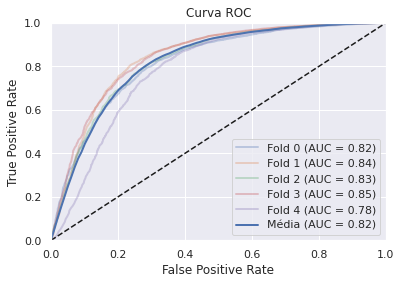

In [24]:
params = {"n_estimators":[1, 100, 200, 500, 1000]} # hiper-parametros

forest = RandomForestClassifier() # Classficador

forest = find_parameters(X, y, forest, params, 5) # Melhor classificador

s = forest.scores # Estatisticas do melhor
print(show_scores(s.precision, s.recall, s.f1, s.folds))

plt_roc(s.fpr, s.tpr, s.folds) # Curva ROC do melhor

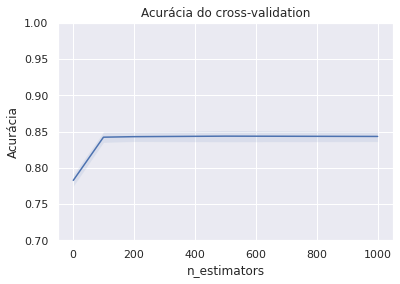

In [26]:
params = {"n_estimators":[1, 100, 200, 500, 1000]} # variando o numero de árvores

forest2 = RandomForestClassifier()
plt_parametro(X, y, forest2, params, 0.7)

#### Explicabilidade

Muitas vezes features importantes aparecerão mais próximo da raiz da árvore, enquanto que features menos importantes muitas vezes aparecem mais perto das folhas (ou não).

A análisa da explicabilidade é de grande importância para o estudo da capacidade preditiva de cada atributo. Pode auxiliar a descobrir features com pouco poder preditivo, que poderiam ser descartadas do dataset.

O Scikit-Learn calcula automaticamente a importância de cada feature depois do treinamento.



Feature ranking:
1. feature Multa (0.248575)
2. feature Juros (0.163366)
3. feature Valor Emprestimo Atualizado (0.155980)
4. feature Idade (0.093298)
5. feature Valor Emprestimo (0.090478)
6. feature Estado (0.035128)
7. feature 3 (0.034833)
8. feature Cheque Sem Fundo (0.029528)
9. feature 1 (0.029204)
10. feature Quant Adiantamento Deposito (0.027524)
11. feature Renda Mensal Informal (0.019628)
12. feature Dependentes (0.017174)
13. feature Genero (0.015420)
14. feature Qtd Fonte Renda (0.011409)
15. feature Conta Poupanca (0.007728)
16. feature 6 (0.005808)
17. feature Conta Conjunta (0.003566)
18. feature Conta Salario (0.003507)
19. feature 2 (0.002369)
20. feature 0 (0.001622)
21. feature 1 (0.001121)
22. feature 2 (0.000978)
23. feature 7 (0.000590)
24. feature 5 (0.000529)
25. feature 8 (0.000472)
26. feature 0 (0.000161)
27. feature 4 (0.000005)


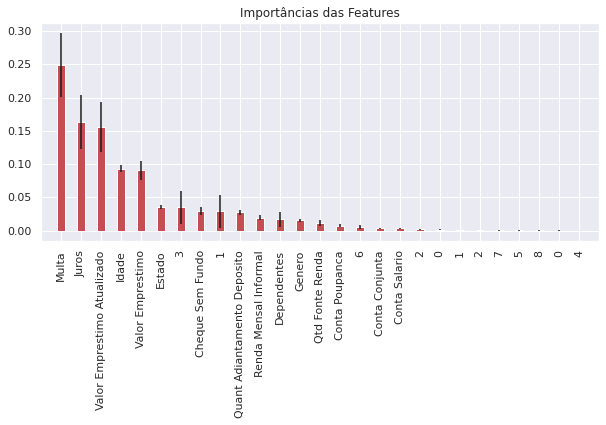

In [27]:
importances = forest.model.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Printa as features mais importantes
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))
    
    
# Plot o grafico da importancia
plt.figure(figsize=(10, 4))  # width:20, height:3
plt.xticks(rotation='vertical')
plt.title("Importâncias das Features")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center", width=0.4)
plt.xticks(range(X.shape[1]), X.columns[indices])
plt.xlim([-1, X.shape[1]])
plt.show()

Os resultados mostram quais features foram mais importantes durante o treinamento do modelo.

A fim de predizer se um empréstimo foi pago ou não, os atributos mais importantes foram `multa`, `juros`, `valor emprestimo atualizado`, `idade` e `valor do emprestimo`.

Outros atributos tiveram pouquissima relavância durante a classificação, como o estado civil.

Em contrapartida, dependendo do valor da multa ou dos juros, por exemplo, pode-se ter uma probabilidade de inadimplência. Conforme mostra a imagem a seguir, quanto maior os juros e a multa, menores serão as chances de um cliente pagar o empréstimo.

De fato, juros e a multa são evidências óbvias de que um cliente está tendo problemas em quitar a dívida. Porém outros fatores também devem ser levados em consideração.

<AxesSubplot:xlabel='Multa', ylabel='Juros'>

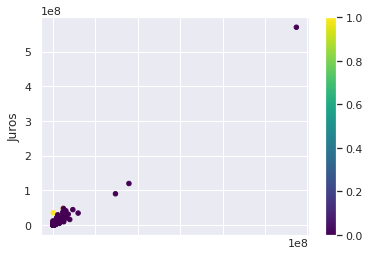

In [83]:
X2.plot.scatter(x='Multa', y='Juros', c=y, colormap='viridis')

#### 3.3.5 Principais Resultados

Os principais resultados para o algoritmo de classificação mostram que o problema é de díficil solução. Isto se deve ao desbalanceamento de classes.

Além disso, os dados não são-linearmente separáveis, por isso, um algoritmo como um perceptron não seria capaz de resolvé-lo.

Dentre todos os modelos avaliados, os melhores resultados foram dos modelos baseados em árvore: decision tree e random forest.

Além disso, o estudo da explicababilidade mostrou quais atributos tiveram maior empacado durante a predição.

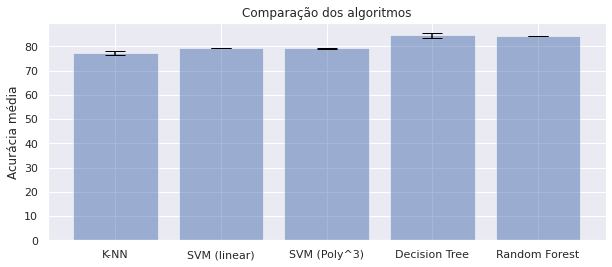

In [64]:
fig, ax = plt.subplots(figsize=(10, 4))

x = np.arange(5)

# média
results = [77.3, 79.2, 79.1, 84.5, 84.3]

# desvio padrão
error = [0.8, 0.1, 0.1, 0.9, 0.07]

plt.bar(x, results, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
plt.xticks(x, ('K-NN', 'SVM (linear)', 'SVM (Poly^3)', 'Decision Tree', 'Random Forest'))
plt.ylabel('Acurácia média')
plt.title("Comparação dos algoritmos")
plt.show()


## 4. Agrupamento de agrupamento

O objetivo deste experimento foi buscar padrões nos dados de empréstimos, agrupamento dados similares por meio de técnicas de clusterização.

Por meio do k-means foi possível agrupar os dados com base na distância calculada pelos atributos.

A media de inércia cai conforme o número de clusters, o método do cotovelo sugere a existência de 3 ~ 4 clusters, que poderiam representar padrões distintos de solicitações de empréstimos.

Text(0.5, 1.0, 'Elbow curve')

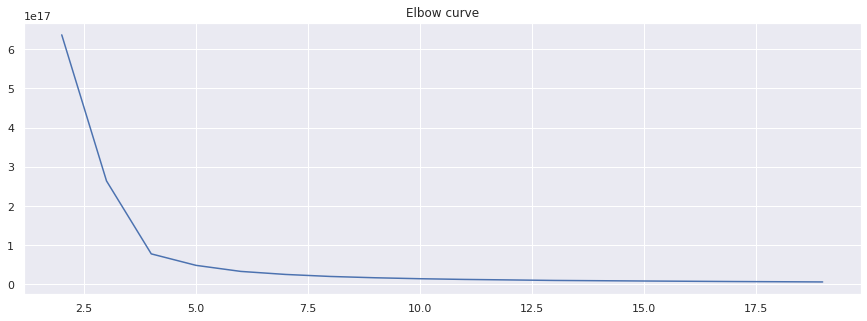

In [92]:
from sklearn.cluster import KMeans

distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

Olhando para a distribuição da classe positiva entre os clusters:

* cluster 0 ficou com todos os exemplos positivos: cerca de 80% positivo e 20% negativo.
* clusters 1 e 2 ficaram apenas com exemplos negativos.

Poderiamos considerar os grupos 1 e 2 como sendo de clientes que de fato não irão pagar. Alguns clientes inadimplentes exibem um padrão bem similar aos dos clientes que pagam empréstimos. Estes clientes representam uma incerteza, no qual diversos modelos tiveram dificuldade em predizer a classe.

In [114]:
kmeans = KMeans(n_clusters=3, init="k-means++")
kmeans.fit(X)

df = pd.DataFrame({'clusters' : kmeans.labels_, 'labels' : y})

df.groupby('clusters').apply(lambda cluster: cluster.sum()/cluster.count())

,clusters,labels
clusters,,
0,0.0,0.790938
1,1.0,0.000000
2,2.0,0.000000


### 5. Conclusões

Neste trabalho, foi analisado quatro classificadores para o problema de detecção de clientes inadimplentes: K-NN, decision tree, SVM e random forest.

O problema teve um certo nivel de dificuldade, a maioria dos classificadores não conseguiu uma acurácia superior a 80%. Observou-se como diferentes abordagens comportam-se diante de um mesmo problema. No geral, os algoritmos baseados em árvores de decisão tiveram um melhor resultado, onde ficou evidenciado que nem sempre o ajuste de funções mais complexas levam ao melhor classificador (SVM com kernel).

Por fim, este estudo avançou tentando analisar quais atributos possuem maior poder preditivo e na descoberta de padrões de solicitações.